# Plotting a tangent

In this notebook we are going to be plotting a curve, and its tangent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the number of data points
num_points = 500

# Create an array of frame numbers from 1 to num_points
frame_numbers = np.arange(1, num_points + 1)

# Create a parametric equation for a circle with sinusoidal oscillation
t = np.linspace(0, 2 * np.pi, num_points)
radius = 1.0
amplitude = 0.1
frequency = 5.0

X = radius * np.cos(t) + amplitude * np.sin(frequency * t)
Y = radius * np.sin(t) + amplitude * np.cos(frequency * t)

In [3]:
# Create a DataFrame
df = pd.DataFrame({'X': X, 'Y': Y, 'fr': frame_numbers})

In [4]:
def calculate_unit_tangent_vector(frame_number):
    if frame_number < 0 or frame_number >= num_points:
        return None  # Frame number out of range

    # Calculate the tangent vector at the specified frame number
    dx = X[frame_number + 1] - X[frame_number]
    dy = Y[frame_number + 1] - Y[frame_number]
    magnitude = np.sqrt(dx**2 + dy**2)

    if magnitude == 0:
        return (0, 0)  # Avoid division by zero

    tangent_vector = (dx / magnitude, dy / magnitude)
    return tangent_vector

Let's put the next lines inside a function with the dynamical feature as parameter

In [7]:
def tangent(example_frame=100):
    global X,Y
    # example_frame = 100 # we don't need this anymore
    # Calculate the unit tangent vector at the example frame
    tangent_vector = calculate_unit_tangent_vector(example_frame)

    # Plot the curve
    plt.figure(figsize=(8, 6))
    plt.plot(X, Y, marker='o', markersize=3, linestyle='-')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Circular Trajectory with Sinusoidal Oscillation of X and Y')
    plt.axis('equal')
    plt.xlim(-1.5, 1.5)
    plt.ylim(-2,2)
    plt.grid(True)
    # Plot the unit tangent vector at the example frame in red
    if tangent_vector is not None:
      x_tangent, y_tangent = X[example_frame], Y[example_frame]
      dx, dy = tangent_vector
      plt.quiver(x_tangent, y_tangent, dx, dy, color='red', angles='xy', scale_units='xy', scale=1, width=0.005)
    plt.show()
    

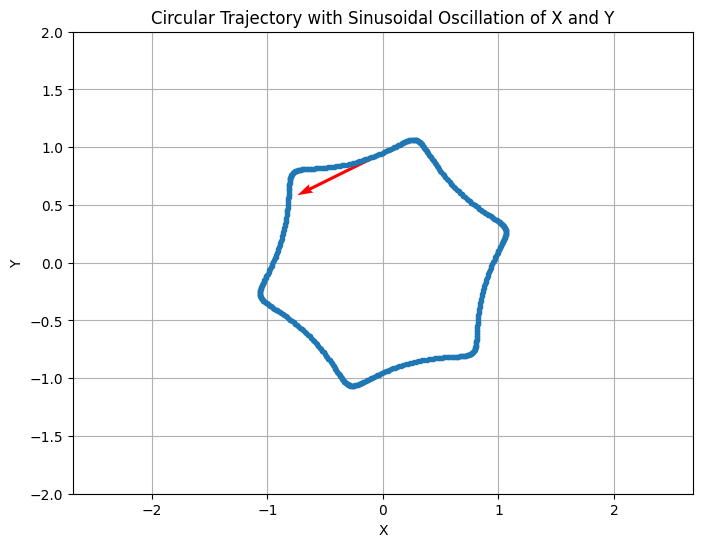

In [8]:
tangent(120)

In [9]:
import ipywidgets as widgets

In [11]:
widgets.interact(tangent,example_frame=(0,num_points,1))

interactive(children=(IntSlider(value=100, description='example_frame', max=500), Output()), _dom_classes=('wi…

<function __main__.tangent(example_frame=100)>